## This notebook is being prepared for Capstone project in Coursera Data Science Professional Certification course by IBM.

In [4]:
#!pip install folium
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [5]:
# @Hidden_Cell.
# read the complete data set
df = pd.read_html('https://github.com/pkpk1717/Coursera_capstone/blob/master/data/complete_dataset.csv', header = 0)[0]
print(df.shape)
df.head()

(64, 9)


,Unnamed: 0,Unnamed: 1,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,NaN,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,NaN,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,NaN,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,NaN,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,NaN,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [6]:
# drop unnamed columns
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(10)

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


'Population' and 'Income' dataframe from the main dataframe

In [7]:
blr_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
blr_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [8]:
blr_population.to_csv('population_dataset.csv')

In [9]:
blr_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
blr_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [10]:
blr_income.to_csv('income_dataset.csv')

In [11]:
blr_latitude = df['Latitude'].mean()
blr_longitude = df['Longitude'].mean()
print("Bangalore Latitude and Longitude : ",blr_latitude,blr_longitude)

Bangalore Latitude and Longitude :  12.962339620312497 77.60175294687502


In [12]:
# @Hidden_Cell
CLIENT_ID = 'YRBIHPMKNOOVV0X25YGEC2JLBWLUDQME5WSQYWLOHNTWRUWS' # your Foursquare ID
CLIENT_SECRET = '5MA0XVYG1UI1U4HV1WB3QJ0JTQMYZT34ZC3KMDTPLZZKDKWG' # your Foursquare Secret
VERSION = '20190714'
LIMIT = 150

In [13]:
unique_boroughs_of_blr = df['Borough'].unique().tolist()

In [14]:
unique_boroughs_of_blr

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [15]:
borough_colors ={}
for i in unique_boroughs_of_blr:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [16]:
borough_colors

{'Central': '#6F3D9C',
 'Eastern': '#CCB2D4',
 'NorthEastern': '#3F02E7',
 'Northern': '#BAC81D',
 'SouthEastern': '#BB4117',
 'Southern': '#CC735F',
 'SouthernSuburbs': '#934427',
 'Western': '#24E1B3'}

In [17]:
blr_map = folium.Map(location=[blr_latitude,blr_longitude],zoom_start=12,control_scale=True)

In [18]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(blr_map)

In [19]:
blr_map

using FourSquare API - Exploring bangalore Neighborhoods 

In [20]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    CLIENT_ID = 'YRBIHPMKNOOVV0X25YGEC2JLBWLUDQME5WSQYWLOHNTWRUWS'
    CLIENT_SECRET = '5MA0XVYG1UI1U4HV1WB3QJ0JTQMYZT34ZC3KMDTPLZZKDKWG'

    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [21]:
blr_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [22]:
print("Total number of venues found in Bangalore are : ",blr_venues.shape[0])

Total number of venues found in Bangalore are :  612


In [23]:
blr_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [24]:
blr_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       115
Café                     30
Bakery                   29
Ice Cream Shop           23
Fast Food Restaurant     23
Department Store         21
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       16
Restaurant               13
Name: Neighborhood, dtype: int64

In [25]:
print("Total number of unique categories in bangalore are : ",len(blr_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  126


Number of venues per neighborhood

In [26]:
individual_blr_venue_count = blr_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [27]:
individual_blr_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     12
                Indiranagar                67
                Jeevanbheemanagar           5
                Malleswaram                 6
                Pete area                   4
                Rajajinagar                10
                Sadashivanagar             23
                Seshadripuram               9
                Shivajinagar               12
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  27
                CV Raman Nagar              7
                Hoodi                       3
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                8
                Varthur                     1
                Whitefield                 11
NorthEastern    Banaswadi                   8
                HBR Layout                  5
                Horamavu                    1
                Kammanahalli               10
                Lingarajapuram              1
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  12
                R. T. Nagar                 7
...                                       ...
                Yeshwanthpur                7
SouthEastern    BTM Layout                 35
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             4
                HSR Layout                  9
                Koramangala                 6
                Madiwala                   32
Southern        Banashankari               10
                Basavanagudi                9
                Girinagar                   3
                J. P. Nagar                25
                Jayanagar                  13
                Kumaraswamy Layout          8
                Padmanabhanagar             5
                Uttarahalli                12
SouthernSuburbs Arekere                    27
                Begur                       4
                Gottigere                   7
                Hulimavu                    8
                Kothnur                     5
Western         Basaveshwaranagar          22
                Kamakshipalya               2
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  8
                Nandini Layout              2
                Nayandahalli                4
                Rajarajeshwari Nagar        6
                Vijayanagar                 5

[62 rows x 1 columns]

In [28]:
individual_blr_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [29]:
individual_blr_venue_count.reset_index(inplace=True)

In [30]:
individual_blr_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,12
2,Central,Indiranagar,67
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,6
5,Central,Pete area,4
6,Central,Rajajinagar,10
7,Central,Sadashivanagar,23
8,Central,Seshadripuram,9
9,Central,Shivajinagar,12


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

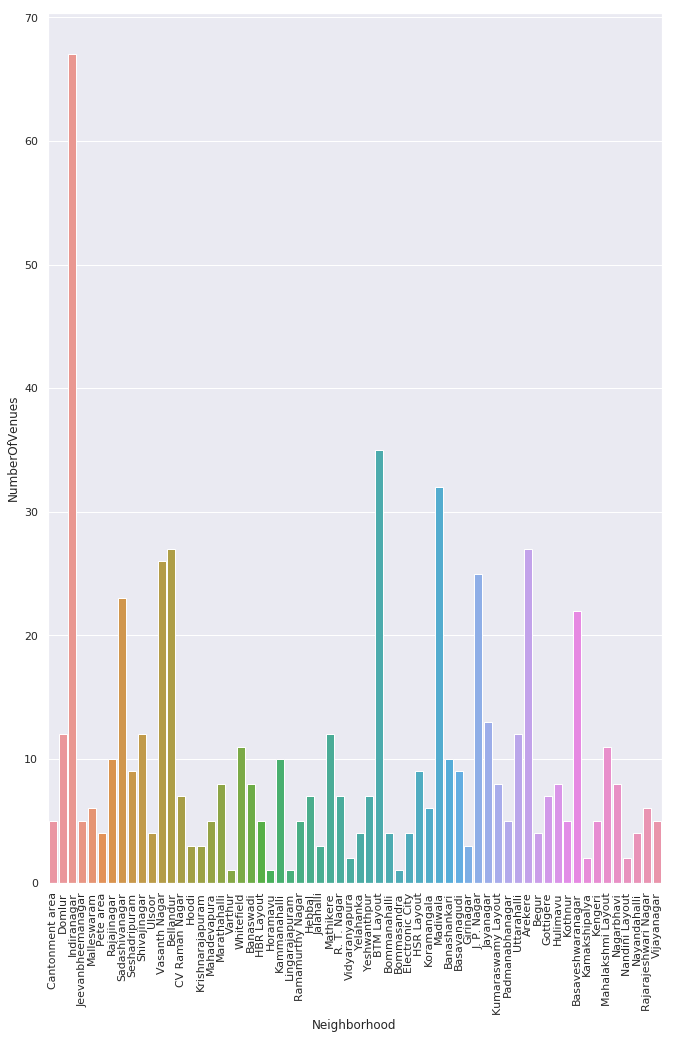

In [31]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_blr_venue_count)
plot.set_xticklabels(individual_blr_venue_count['Neighborhood'],rotation=90)

Exploring Whitefield venues

In [32]:
blr_venues[blr_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
237,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
238,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
239,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
240,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
241,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
242,Whitefield,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
243,Whitefield,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
244,Whitefield,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
245,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
246,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [33]:
blr_venues_onehot = pd.get_dummies(blr_venues[['Venue Category']])

In [34]:
blr_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
blr_venues_onehot['Neighborhood'] = blr_venues['Neighborhood']
blr_venues_grouped = blr_venues_onehot.groupby('Neighborhood').mean().reset_index()
blr_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0.00,0.000,0.000000,0.0,0.000000,0.037037,0.000000,0.000000,0.000,...,0.037037,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,BTM Layout,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.057143,0.000000,0.000000
2,Banashankari,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Banaswadi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.125000,0.000000,0.000000
4,Basavanagudi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Basaveshwaranagar,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Begur,0.25,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bellandur,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.037037,0.000000,0.00,0.00,0.037037,0.000000,0.000000,0.000000,0.000000
8,Bommanahalli,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommasandra,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
number_of_top_venues = 5

In [37]:
for hood in blr_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = blr_venues_grouped[blr_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.22
1  Venue Category_Sporting Goods Shop       0.15
2     Venue Category_Department Store       0.07
3   Venue Category_Mughlai Restaurant       0.04
4     Venue Category_Business Service       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.17
1      Venue Category_Ice Cream Shop       0.09
2         Venue Category_Snack Place       0.09
3  Venue Category_Chinese Restaurant       0.09
4      Venue Category_Sandwich Place       0.06


--------- Banashankari ---------
                                    Venue  Frequency
0           Venue Category_Clothing Store        0.2
1                     Venue Category_Café        0.2
2        Venue Category_Indian Restaurant        0.1
3      Venue Category_Sporting Goods Shop        0.1
4  Venue Category_North Indian Restaurant        0.1


--

Frequency of each neighborhood and its top 5 venues can be known. 
This is very important is we can analyze top neighborhoods with most busy restaurants

In [38]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [39]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_venues_grouped['Neighborhood']

for ind in np.arange(blr_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Business Service
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,Venue Category_Punjabi Restaurant
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Hookah Bar,Venue Category_Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Café,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant


In [40]:
neighborhoods_venues_sorted.shape

(62, 11)

Next challenge is to find the optimal k value for clustering and we do it using the elbow method

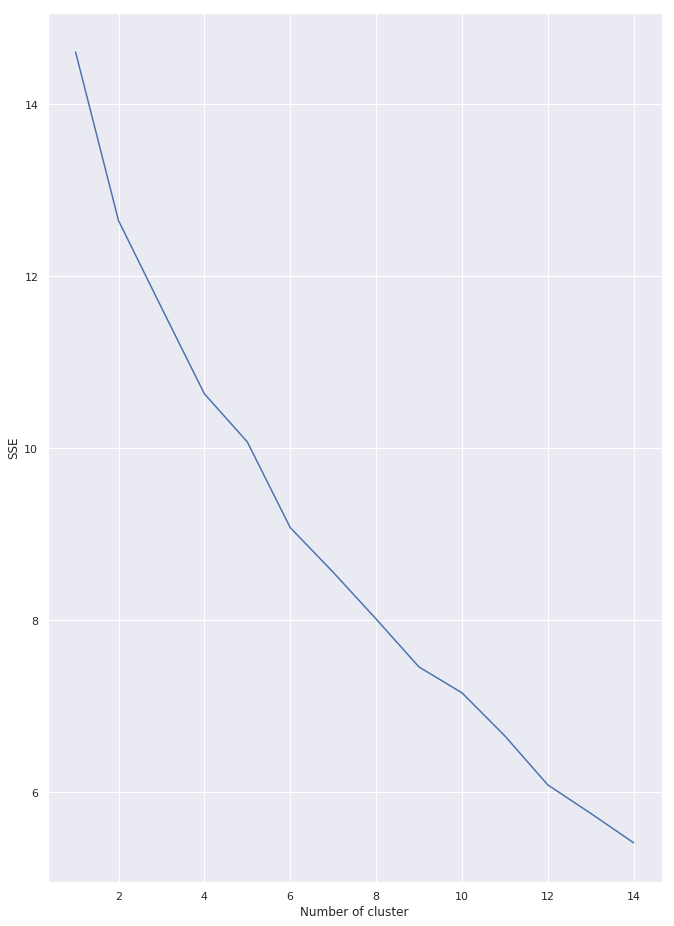

In [41]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(blr_venues_grouped.drop('Neighborhood',axis=1))
    blr_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, we can see the optimal value for cluster is 5.

In [42]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [43]:
kmeans.fit(blr_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [44]:
blr_venues_grouped['Cluster'] = kmeans.labels_

In [45]:
blr_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     3
1    20
2    11
3    23
4     5
Name: Neighborhood, dtype: int64

In [46]:
blr_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=128)

In [47]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(blr_venues_grouped,on='Neighborhood')

In [48]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,1
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,2


In [49]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(blr_venues,on='Neighborhood')

In [50]:
# create map
map_clusters = folium.Map(location=[blr_latitude, blr_longitude], zoom_start=11)

In [51]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [52]:
map_clusters

Finding similar locations based on user input (recommending location). We need to analyze factors such as population and Income to recommend

In [53]:
blr_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [54]:
blr_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [55]:
blr_population['Normalized_population'] = blr_population['Population']/blr_population['Population'].max(axis=0)
blr_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [56]:
blr_income['Normalized_income'] = blr_income['AverageIncome']/blr_income['AverageIncome'].max(axis=0)
blr_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [57]:
blr_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [58]:
blr_veg = blr_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
blr_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
blr_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     2
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
     ..
32    0
33    0
34    0
35    1
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    1
48    0
49    0
50    1
51    0
52    0
53    0
54    0
55    0
56    1
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [60]:
blr_veg = blr_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [61]:
blr_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [62]:
blr_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [63]:
blr_veg['NumberOfNonVeganrestaurants'] = 1-(blr_veg['NumberOfVegRestaurants']/blr_veg['NumberOfVegRestaurants'].max(axis=0))

In [64]:
blr_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


In [65]:
blr_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [66]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [67]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,590,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,591,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,592,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,593,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,594,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,595,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
6,596,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Cult - The Workout Station Whitefield,12.968434,77.749597,Gym / Fitness Center
7,597,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
8,598,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
9,599,Whitefield,Venue Category_Gym / Fitness Center,Venue Category_Hotel,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Diner,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Bakery,...,0.0,0.0,1,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [68]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [69]:
target_cluster

1

In [70]:
print("The target cluster is : ",target_cluster)

The target cluster is :  1


In [71]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
27,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Adyar Ananda Bhavan (A2B),12.916653,77.609745,Vegetarian / Vegan Restaurant
28,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,McDonald's,12.915874,77.610119,Burger Joint
29,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Core Fitness,12.913980,77.609382,Gym
30,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,New Friends rooftop euro restaurant,12.916651,77.612409,Restaurant
31,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Gyani Da Punjabi Dhaba,12.916176,77.612200,Indian Restaurant


In [72]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 253 neighborhoods which has similar characteristics to Whitefield.


In [73]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,27,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Adyar Ananda Bhavan (A2B),12.916653,77.609745,Vegetarian / Vegan Restaurant
1,28,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,McDonald's,12.915874,77.610119,Burger Joint
2,29,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Core Fitness,12.913980,77.609382,Gym
3,30,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,New Friends rooftop euro restaurant,12.916651,77.612409,Restaurant
4,31,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,...,0.0,0.0,1,SouthEastern,12.9166,77.6101,Gyani Da Punjabi Dhaba,12.916176,77.612200,Indian Restaurant


In [75]:
possible_neighborhoods.rename(columns={"Neighborhood":"Neighborhoods"},inplace=True)

In [76]:
possible_neighborhoods = possible_neighborhoods.merge(blr_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(blr_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(blr_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [77]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,Adyar Ananda Bhavan (A2B),12.916653,77.609745,Vegetarian / Vegan Restaurant,835743,0.849666,49310.618884,0.762797,2,0.0
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,McDonald's,12.915874,77.610119,Burger Joint,835743,0.849666,49310.618884,0.762797,2,0.0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,Core Fitness,12.913980,77.609382,Gym,835743,0.849666,49310.618884,0.762797,2,0.0
3,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,New Friends rooftop euro restaurant,12.916651,77.612409,Restaurant,835743,0.849666,49310.618884,0.762797,2,0.0
4,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,Gyani Da Punjabi Dhaba,12.916176,77.612200,Indian Restaurant,835743,0.849666,49310.618884,0.762797,2,0.0


In [78]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [79]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Rajajinagar,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.987138,77.549514,Indian Restaurant,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
1,Rajajinagar,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.991578,77.554561,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
2,Rajajinagar,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.987669,77.549978,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
3,Rajajinagar,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.987441,77.549826,Bakery,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947
4,Rajajinagar,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Arts & Crafts Store,Venue Category_Fast Food Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,12.988665,77.552434,Arts & Crafts Store,981362,0.99771,60967.535874,0.943121,1,0.5,0.878947


In [80]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [81]:
top3_df = pd.DataFrame(top3).reset_index()

In [82]:
top3_df.head(10)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,[0.6918117751640322]
1,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,[0.8234029969357849]
2,Basaveshwaranagar,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,[0.6426377807870477]
3,Begur,Venue Category_ATM,Venue Category_Supermarket,Venue Category_Clothing Store,[0.7361321887351776]
4,HSR Layout,Venue Category_Department Store,Venue Category_Indian Restaurant,Venue Category_Fish & Chips Shop,[0.619394501626356]
5,Hulimavu,Venue Category_Bakery,Venue Category_Karnataka Restaurant,Venue Category_North Indian Restaurant,[0.7638135476902764]
6,Indiranagar,Venue Category_Pub,Venue Category_Café,Venue Category_Lounge,[0.5684483844100865]
7,Jalahalli,Venue Category_Convenience Store,Venue Category_Playground,Venue Category_Indie Movie Theater,[0.4428670274908466]
8,Jeevanbheemanagar,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Gym,[0.4044330054937273]
9,Koramangala,Venue Category_Hotel,Venue Category_Bakery,Venue Category_Hotel Bar,[0.4636103801895921]


## The above model recommends these top 10 neighborneeds and its respective common venues to visit.
## Thank you for your efforts in reviewing this.

## ---------------  Kammanahalli ----------------

In [83]:
blr_venues[blr_venues['Neighborhood']=='Kammanahalli']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
262,Kammanahalli,NorthEastern,13.0159,77.6379,Al Amanah,13.015631,77.639408,Falafel Restaurant
263,Kammanahalli,NorthEastern,13.0159,77.6379,New Peking Restaurant,13.017676,77.636364,Chinese Restaurant
264,Kammanahalli,NorthEastern,13.0159,77.6379,Arirang Restaurant,13.019660,77.637149,Korean Restaurant
265,Kammanahalli,NorthEastern,13.0159,77.6379,Cafe Thulp,13.016326,77.634664,Burger Joint
266,Kammanahalli,NorthEastern,13.0159,77.6379,New Kairali Family Restaurant,13.014340,77.636146,Kerala Restaurant
267,Kammanahalli,NorthEastern,13.0159,77.6379,Anand Sweets,13.019472,77.636849,Snack Place
268,Kammanahalli,NorthEastern,13.0159,77.6379,Hotel Empire,13.014599,77.635716,Indian Restaurant
269,Kammanahalli,NorthEastern,13.0159,77.6379,Nandhana Palace,13.014937,77.635844,Andhra Restaurant
270,Kammanahalli,NorthEastern,13.0159,77.6379,al amal Cafe',13.014318,77.636584,Fast Food Restaurant
271,Kammanahalli,NorthEastern,13.0159,77.6379,Big Chicken,13.019870,77.636735,Fast Food Restaurant


In [84]:
blr_venues_onehot = pd.get_dummies(blr_venues[['Venue Category']])
blr_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
blr_venues_onehot['Neighborhood'] = blr_venues['Neighborhood']
blr_venues_grouped = blr_venues_onehot.groupby('Neighborhood').mean().reset_index()
blr_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0.00,0.000,0.000000,0.0,0.000000,0.037037,0.000000,0.000000,0.000,...,0.037037,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,BTM Layout,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.057143,0.000000,0.000000
2,Banashankari,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Banaswadi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.125000,0.000000,0.000000
4,Basavanagudi,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Basaveshwaranagar,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Begur,0.25,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bellandur,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.037037,0.000000,0.00,0.00,0.037037,0.000000,0.000000,0.000000,0.000000
8,Bommanahalli,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommasandra,0.00,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [86]:
number_of_top_venues = 5

In [87]:
for hood in blr_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = blr_venues_grouped[blr_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.22
1  Venue Category_Sporting Goods Shop       0.15
2     Venue Category_Department Store       0.07
3   Venue Category_Mughlai Restaurant       0.04
4     Venue Category_Business Service       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.17
1      Venue Category_Ice Cream Shop       0.09
2         Venue Category_Snack Place       0.09
3  Venue Category_Chinese Restaurant       0.09
4      Venue Category_Sandwich Place       0.06


--------- Banashankari ---------
                                    Venue  Frequency
0           Venue Category_Clothing Store        0.2
1                     Venue Category_Café        0.2
2        Venue Category_Indian Restaurant        0.1
3      Venue Category_Sporting Goods Shop        0.1
4  Venue Category_North Indian Restaurant        0.1


--

In [88]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [89]:
number_of_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [90]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_venues_grouped['Neighborhood']

for ind in np.arange(blr_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,Venue Category_Business Service
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,Venue Category_Punjabi Restaurant
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Hookah Bar,Venue Category_Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Café,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant


In [91]:
neighborhoods_venues_sorted.shape

(62, 11)

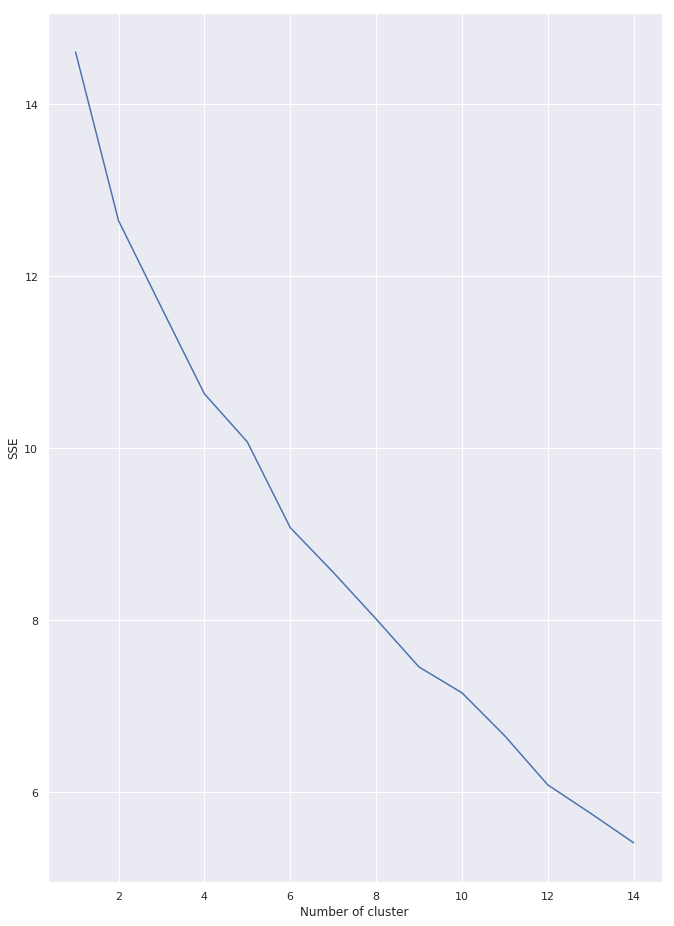

In [92]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(blr_venues_grouped.drop('Neighborhood',axis=1))
    blr_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [93]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(blr_venues_grouped.drop('Neighborhood',axis=1))
blr_venues_grouped['Cluster'] = kmeans.labels_

In [94]:
blr_venues_grouped.groupby('Cluster')['Neighborhood'].count()
blr_venues_grouped.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(blr_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Burger Joint,Venue Category_Bar,Venue Category_Mughlai Restaurant,Venue Category_Pizza Place,Venue Category_Chinese Restaurant,Venue Category_Liquor Store,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Sandwich Place,Venue Category_Bakery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,1
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Men's Store,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,2


In [95]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(blr_venues,on='Neighborhood')
# create map
map_clusters = folium.Map(location=[blr_latitude, blr_longitude], zoom_start=11)

In [96]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


In [97]:
map_clusters

In [98]:
blr_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [99]:
blr_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [100]:
blr_population['Normalized_population'] = blr_population['Population']/blr_population['Population'].max(axis=0)
blr_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [101]:
blr_income['Normalized_income'] = blr_income['AverageIncome']/blr_income['AverageIncome'].max(axis=0)
blr_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [102]:
blr_venues_grouped.head(1)
blr_veg = blr_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
blr_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Supermarket,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
blr_veg['Venue Category_Vegetarian / Vegan Restaurant']
blr_veg = blr_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
blr_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
blr_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [104]:
blr_veg['NumberOfNonVeganrestaurants'] = 1-(blr_veg['NumberOfVegRestaurants']/blr_veg['NumberOfVegRestaurants'].max(axis=0))
blr_veg.head(10)
blr_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Kammanahalli']

In [105]:
target_cluster_dataframe.reset_index()
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
target_cluster
print("The target cluster is : ",target_cluster)

The target cluster is :  2


In [106]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
72,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
73,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
74,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
75,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Trust Chemists & Druggists,13.012673,77.647674,Pharmacy
76,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Foodworld Super Market,13.013297,77.648234,Convenience Store


In [108]:
print("There are {} neighborhoods which has similar characteristics to Kammanahalli.".format(possible_neighborhoods.shape[0]))
possible_neighborhoods.reset_index().head()

There are 68 neighborhoods which has similar characteristics to Kammanahalli.


,index,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,72,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
1,73,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
2,74,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
3,75,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Trust Chemists & Druggists,13.012673,77.647674,Pharmacy
4,76,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,...,0.0,0.0,2,NorthEastern,13.012,77.6471,Foodworld Super Market,13.013297,77.648234,Convenience Store


In [109]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [110]:
possible_neighborhoods = possible_neighborhoods.merge(blr_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(blr_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(blr_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,Tamarind,13.012676,77.647711,Indian Restaurant,632031,0.64256,53349.701184,0.825279,1,0.5
1,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,Amma Pasteries,13.009575,77.643255,Bakery,632031,0.64256,53349.701184,0.825279,1,0.5
2,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant,632031,0.64256,53349.701184,0.825279,1,0.5
3,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,Trust Chemists & Druggists,13.012673,77.647674,Pharmacy,632031,0.64256,53349.701184,0.825279,1,0.5
4,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Market,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dessert Shop,...,Foodworld Super Market,13.013297,77.648234,Convenience Store,632031,0.64256,53349.701184,0.825279,1,0.5


In [111]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Road,Venue Category_Flea Market,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,13.037118,77.628266,Café,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096
1,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Road,Venue Category_Flea Market,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,13.040186,77.625021,Restaurant,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096
2,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Road,Venue Category_Flea Market,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,13.034330,77.628848,Coffee Shop,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096
3,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Road,Venue Category_Flea Market,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,13.034016,77.628998,North Indian Restaurant,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096
4,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,Venue Category_Restaurant,Venue Category_Road,Venue Category_Flea Market,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,...,13.034846,77.628680,Road,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096


In [112]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()
top3_df = pd.DataFrame(top3).reset_index()
top3_df.head(10)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banaswadi,Venue Category_Convenience Store,Venue Category_Grocery Store,Venue Category_Kerala Restaurant,[0.6601274737586615]
1,Electronic City,Venue Category_Auto Garage,Venue Category_Outlet Store,Venue Category_Toll Plaza,[0.5423513638809381]
2,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Café,[0.7540959810582033]
3,Kammanahalli,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Indian Restaurant,[0.596719375232943]
4,Kengeri,Venue Category_Food Court,Venue Category_Gym / Fitness Center,Venue Category_Indian Restaurant,[0.2112540213432405]
5,Kothnur,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Department Store,Venue Category_Athletics & Sports,[0.38370546071987155]
6,Kumaraswamy Layout,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Burger Joint,[0.6592393515253516]
7,Mahalakshmi Layout,Venue Category_Hotel,Venue Category_Coffee Shop,Venue Category_Convenience Store,[0.3013214147266386]
8,Nayandahalli,Venue Category_Electronics Store,Venue Category_Road,Venue Category_Fast Food Restaurant,[0.5949468624379443]
9,Varthur,Venue Category_Supermarket,Venue Category_Women's Store,Venue Category_Food & Drink Shop,[0.5749004882508668]
